In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import svm 

import sklearn
import sklearn.ensemble
import sklearn.metrics

In [227]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)


train = pd.read_csv("data_train_preprocessed.csv", keep_default_na=False)
test = pd.read_csv("data_test_preprocessed.csv", keep_default_na=False)


features_train = vectorizer.fit_transform(train["processed_text_alt"])
classes_train = train["binary_labels"]
N_train = len(classes_train)


features_test = vectorizer.transform(test["processed_text_alt"])
classes_test = test["binary_labels"]
N_test = len(classes_test)

In [228]:
SVM_linear = svm.SVC(kernel="linear",probability=True) 
SVM_linear.fit(features_train,classes_train)

SVC(kernel='linear', probability=True)

In [229]:
print(f"Correctly predicted:\n")

#Predictions on the training set
predictions_train = SVM_linear.predict(features_train)
N_train = len(classes_train)
correct = sum(predictions_train == classes_train)
print(f"Training: {correct*100/N_train:.2f}% ({correct} of {N_train})")

#Predictions on the testing set
predictions_test = SVM_linear.predict(features_test)
N_test = len(classes_test)
correct = sum(predictions_test == classes_test)
print(f"Testing:  {correct*100/N_test:.2f}% ({correct} of {N_test})")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n")
print(f"Accuracy: {accuracy_score(classes_test,predictions_test):.02f}") # TODO
print(f"Precision:{precision_score(classes_test,predictions_test):.02f}") # TODO
print(f"Recall:   {recall_score(classes_test,predictions_test):.02f}") # TODO
print(f"F1:       {f1_score(classes_test,predictions_test):.02f}") # TODO

Correctly predicted:

Training: 92.53% (2788 of 3013)
Testing:  75.71% (268 of 354)


Accuracy: 0.76
Precision:0.66
Recall:   0.63
F1:       0.64


In [230]:
from sklearn.metrics import classification_report
print(classification_report(classes_test, predictions_test))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       230
           1       0.66      0.63      0.64       124

    accuracy                           0.76       354
   macro avg       0.73      0.73      0.73       354
weighted avg       0.75      0.76      0.76       354



In [231]:
#Get probabilities for classes
p_train = SVM_linear.predict_proba(features_train)
p_test = SVM_linear.predict_proba(features_test)

In [232]:
class_probability = p_test[:,0] #probabilities of class 0
class_true = classes_test == 0 #true classification of class 0 (in a True/False manner, where True stands for class 0)

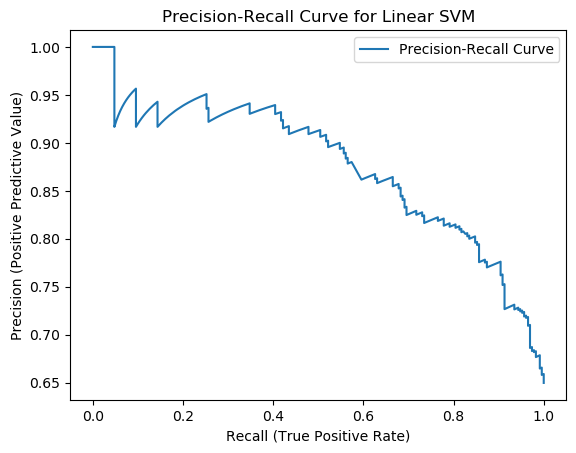

In [233]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming 'class_true' contains your true binary labels and 'class_probability' contains the probability estimates of the positive class
precision, recall, thresholds = precision_recall_curve(y_true=class_true, probas_pred=class_probability)

plt.figure()
plt.title("Precision-Recall Curve for Linear SVM")  # More descriptive title
plt.xlabel("Recall (True Positive Rate)")  # More descriptive x-axis label
plt.ylabel("Precision (Positive Predictive Value)")  # More descriptive y-axis label
plt.plot(recall, precision, label='Precision-Recall Curve')  # Add a label to the curve
plt.legend(loc='best')  # Add a legend to clarify what the curve represents

# Optional: Add a grid for easier readability
plt.grid(False)

plt.savefig("plots/SVM_Precision_Recall_Curve.jpeg")


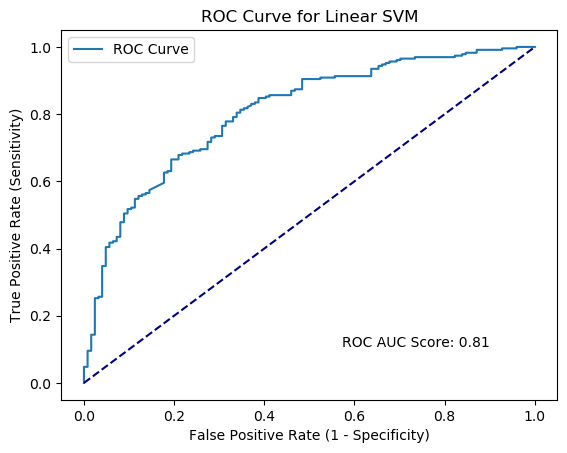

In [234]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
roc_auc=roc_auc_score(class_true,class_probability)
# Assuming 'class_true' contains your true binary labels and 'class_probability' contains the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(class_true, class_probability)

plt.figure()
plt.title("ROC Curve for Linear SVM")  # Descriptive title
plt.xlabel("False Positive Rate (1 - Specificity)")  # X-axis label
plt.ylabel("True Positive Rate (Sensitivity)")  # Y-axis label
plt.plot(fpr, tpr, label='ROC Curve')  # Plot the ROC curve
plt.legend(loc='best')  # Add a legend

# Optional: Add diagonal line representing a no-skill classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Optional: Add a grid
plt.grid(False)
# Add ROC AUC score as annotation
plt.annotate(f'ROC AUC Score: {roc_auc:.2f}',  # Format the text with score rounded to 2 decimal places
             xy=(0.95, 0.05),  # Location of the end of the arrow (in this case, bottom right)
             xytext=(0.9, 0.1),  # Location of the text
             horizontalalignment='right',  # Right align the text
             verticalalignment='bottom')

plt.savefig("plots/SVM_ROC_Curve.jpeg")


# Visualize with PCA

## Test

In [235]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_test.toarray())

# Extract the reduced components
x = reduced_features[:, 0]
y = reduced_features[:, 1]

Testing
True values


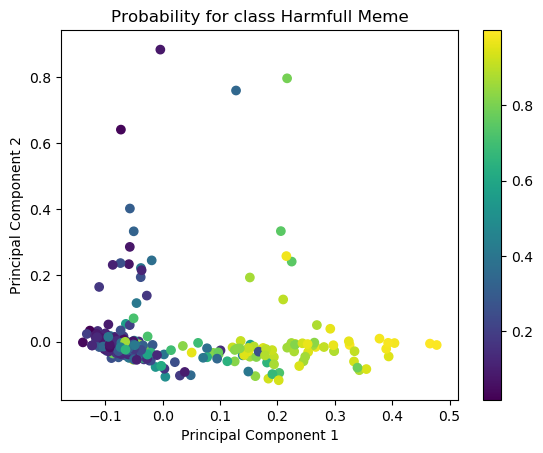

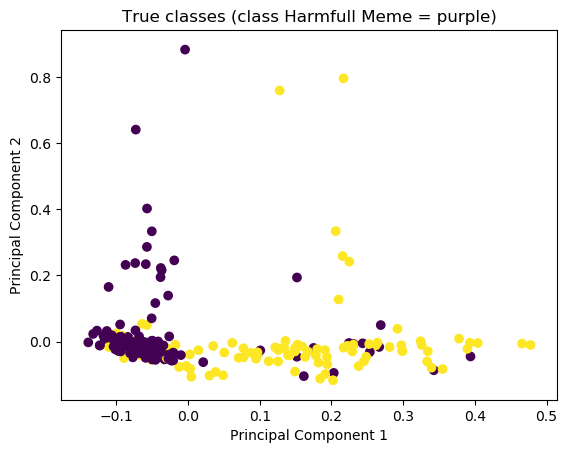

In [236]:
c = 1 #class for which we analyze the probability.
#   As we deal with binary classes (either 0 or 1), the probabilities of class 1 are the inverse of 0,
#   so we do not need to visualize them
if c == 0:
    d = "Harmless Meme"
else:
    d = "Harmfull Meme"
    
print("Testing")
plt.figure()
plt.title(f"Probability for class {d}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(x, y, c=p_test[:,c])
plt.colorbar()
plt.savefig("plots/SVM_PCA_PredClass.jpeg")

print("True values")
plt.figure()
plt.title(f"True classes (class {d} = purple)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(x, y, c=classes_test)

plt.savefig("plots/SVM_PCA_TrueClass.jpeg")
